<div style='float:left; margin-right:20pt; width:10em'><img src='UPEM_LOGO_PAPETERIE_300DPI.png'></div>
<div style='float:left; font-size:larger'><strong>Algorithmique et programmation 2</strong><br>
L1 Mathématiques - L1 Informatique<br>
Semestre 2
</div>

# Complexité algorithmique

## Motivation

-   On n’exige pas seulement d’un algorithme qu’il résolve un problème,
    c’est-à-dire :

    -   qu’il donne la bonne réponse (**correction**)
    -   en un temps fini (**terminaison**)
    -   sur chaque instance

-   On veut également qu’il soit **efficace**, c’est-à-dire :

    -   rapide (en termes de temps d’exécution)
    -   peu gourmand en ressources (mémoire utilisée)
    
    *(on s’intéressera pour commencer au temps d’exécution)*

## Mesure de performances

On peut utiliser la fonction `time()` du module `time` pour chronométrer l'exécution, pourquoi pas pour tracer des graphiques

In [1]:
# pour chronométrer
from time import time

# enregistrer le temps de départ
debut = time()

# faire quelque chose
for i in range(10**3):
    pass

# calculer le temps écoulé
print(time() - debut)

0.00020122528076171875


Un autre outil un peu plus élaboré est le module `timeit` :

In [2]:
from timeit import timeit

timeit("""
for i in range(10**3):
    pass
""", number=100)

0.012090716000102475

Sous Jupyter, on peut aussi utiliser les "formules magiques" `%%timeit` (tout une cellule) ou `%timeit` (une seule ligne) :

In [3]:
%%timeit
for i in range(10**6): 
    pass

31.9 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%timeit for i in range(10**6): pass

32.6 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Exemple 1 : recherche dans une liste

#### Algorithme "idéal"

- Soit $L$ une liste, $x$ un élément à chercher
- Pour chaque élément tour à tour dans la liste :
    - Si cet élément est égal à $x$, répondre "vrai" et arrêter
    - Sinon continuer
- Si on atteint la fin de la liste sans avoir trouvé $x$, répondre "faux"

Quels sont les cas où l'algorithme prend le plus de temps (pires cas) ? 

Comment varie la "quantité de travail" à fournir en fonction de $L$ et $x$ dans ces cas ?

> *Moralement*, cela devrait être (au pire) proportionnel au nombre d'éléments dans la liste : il suffit de regarder chaque élément de la liste une fois.

#### Vérification expérimentale : fonction itérative

In [5]:
def recherche_iter(L, x):
    for elem in L:
        if elem == x:
            return True
    return False

In [6]:
liste_mille = list(range(1000))
liste_deux_mille = list(range(2000))

%timeit recherche_iter(liste_mille, 'pas-là')
%timeit recherche_iter(liste_deux_mille, 'absent')

41.7 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
111 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Ici, on voit que si la taille de la liste double, le temps de calcul est multiplié à peu près par deux. Cela semble confirmer l'hypothèse précédente.

#### Vérification expérimentale : fonction récursive

In [7]:
# pour avoir une pile plus grande
from sys import setrecursionlimit  
setrecursionlimit(3000)

In [8]:
def recherche_rec(lst, e):
    if len(lst) == 0:
        return False
    elif lst[0] == e:
        return True
    else:
        return recherche_rec(lst[1:], e)

In [9]:
liste_mille = list(range(1000))
liste_deux_mille = list(range(2000))

%timeit recherche_rec(liste_mille, 'nope')
%timeit recherche_rec(liste_deux_mille, 'cherche ailleurs')

4.36 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.4 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


- Cette fois, pour une liste **deux** fois plus grande, le temps d'exécution est multiplié environ par **quatre** : ça n'a pas l'air proportionnel...

- On remarque aussi que cette fonction est globalement **beaucoup** plus lente que la version itérative (c'est assez normal, on y reviendra).

#### Vérification expérimentale : graphique

Pour y voir plus clair, essayons de tracer un graphique :

In [10]:
# pour dessiner des graphiques
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format='retina'

In [11]:
def teste_recherche(fonction, tailles):
    """
    Fonction cherchant 1 dans des listes de 0
    de longueur données dans tailles.
    Renvoie une liste des temps d'exécution.
    """
    temps = []
    for n in tailles:
        lst = [0] * n
        t = timeit(lambda: fonction(lst, 1), 
                   number=200, globals=globals())
        temps.append(t)
    return temps

In [12]:
# On va tester avec les tailles ci-dessous
tailles = list(range(0, 3000, 300))

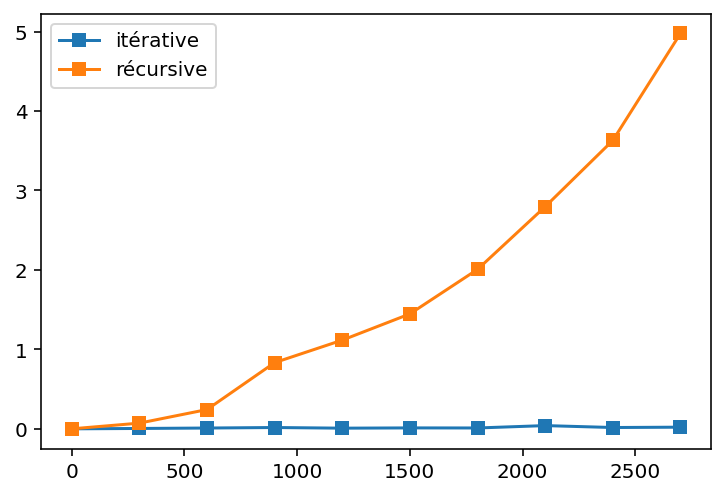

In [13]:
# On lance les tests
temps = teste_recherche(recherche_iter, tailles)
plt.plot(tailles, temps, 's-', label='itérative')

temps = teste_recherche(recherche_rec, tailles)
plt.plot(tailles, temps, 's-', label='récursive')

plt.legend()
pass

Le problème se confirme... la courbe pour la fonction `recherche_rec` ne ressemble pas à une droite.

La raison (déjà donné au chapitre précédent) est que nous utilisons une instruction coûteuse sans en tenir compte :

```python
def recherche_rec(lst, e):
    if len(lst) == 0:
        return False
    elif lst[0] == e:
        return True
    else:
        return recherche_rec(lst[1:], e)
        # lst[1:]  prend un temps proportionnel à len(lst) !!!
```

Pour remédier au problème, on peut utiliser un argument supplémentaire (indice) et ne pas modifier la liste :

In [15]:
def recherche_rec_aux(lst, e, i):
    if len(lst) <= i:
        return False
    elif lst[i] == e:
        return True
    else:
        return recherche_rec_aux(lst, e, i+1)

def recherche_rec2(lst, e):
    return recherche_rec_aux(lst, e, 0)

In [16]:
recherche_rec2([1, 3, -5], 4)

False

In [17]:
recherche_rec2([1, 3, -5], -5)

True

On vérifie que le problème semble résolu :

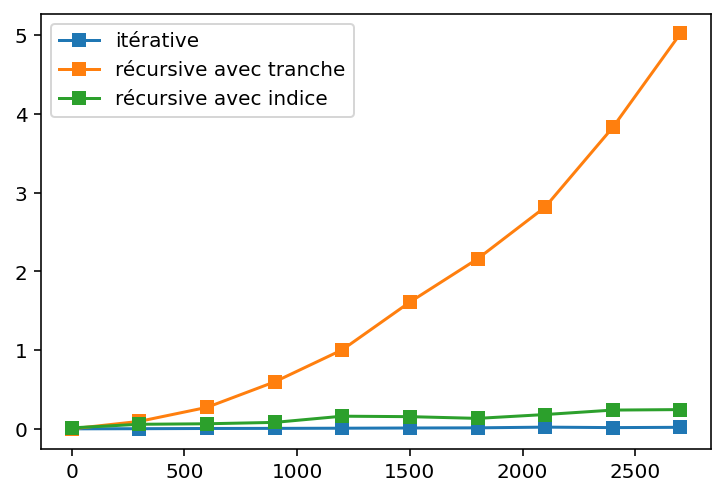

In [20]:
# On lance les tests
temps = teste_recherche(recherche_iter, tailles)
plt.plot(tailles, temps, 's-', label='itérative')

temps = teste_recherche(recherche_rec, tailles)
plt.plot(tailles, temps, 's-', label='récursive avec tranche')

temps = teste_recherche(recherche_rec2, tailles)
plt.plot(tailles, temps, 's-', label='récursive avec indice')

plt.legend()
pass

La fonction récursive reste plus lente (c'est normal) mais au moins le temps d'exécution semble vaguement proportionnel à la taille de la liste.

### Exemple 2 : recherche de doublons

In [20]:
def contient_doublon(lst):
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            if lst[i] == lst[j]:
                return True
    return False

In [21]:
contient_doublon([1, 0, 3, 4, 1, 3])

True

In [22]:
contient_doublon([1, 0, 3, 4, 2, -3])

False

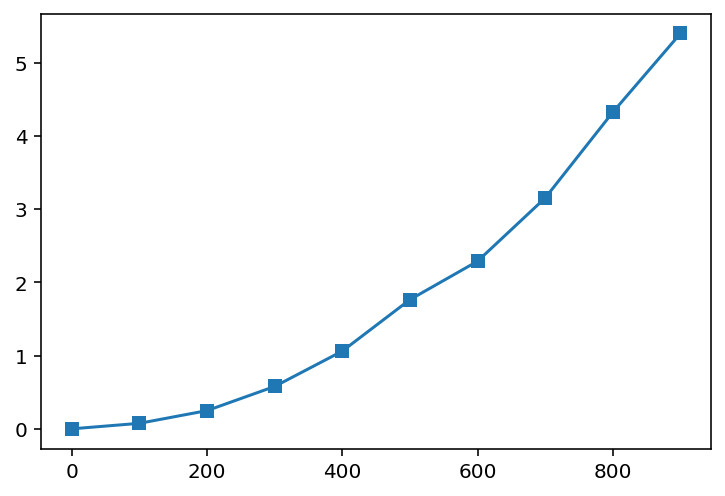

In [23]:
tailles = list(range(0, 1000, 100))

temps = []
for n in tailles:
    lst = list(range(n))
    t = timeit('contient_doublon(lst)', 
               globals=globals(), number=100)
    temps.append(t)

plt.plot(tailles, temps, 's-')
pass

Ça n'a toujours pas l'air linéaire... Essayons le "test de doublement" :

In [24]:
liste_mille = list(range(1000))
liste_deux_mille = list(range(2000))

%timeit contient_doublon(liste_mille)
%timeit contient_doublon(liste_deux_mille)

60.8 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
249 ms ± 31.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Pour une liste de taille **double**, le temps de calcul a **beaucoup plus que doublé**. On verra plus précisément dans la suite comment évolue le temps de calcul de cette fonction par rapport à `len(lst)`.

## La complexité d'un algorithme

-   Inconvénients du chronométrage de programmes :

    -   nécessite d’implémenter les algorithmes
    -   mesures dépendant de nombreux facteurs (machine, langage, charge...)
    -   peut être dur à implémenter
    -   observations difficiles à transposer, à généraliser...

-   On veut pouvoir évaluer la qualité **théorique** des algorithmes

    -   quel algorithme choisir **avant de commencer à programmer** ?
    -   pourquoi tel programme est-il aussi lent ?
    -   où agir pour améliorer un algorithme ?

-   La **théorie de la complexité** (algorithmique) permet aussi :

    -   de classer les *algorithmes* selon leur efficacité
    -   de comparer plusieurs algorithmes résolvant un même problème
        *sans les implémenter*
    -   de classer les *problèmes* selon leur difficulté


-   **Idée de base :** *compter* le nombre d’opérations élémentaires effectuées

### Comptage des opérations

-   Chaque **opération élémentaire** compte pour une “unité de temps”
    (pour simplifier)

    -   exemples : `=`, `==`, `<=`, `+`, `-`, `*`, `/`, `lst[i]`...

    -   considérées comme prenant un temps “constant” (indépendant de
        l’entrée)

    -   doivent être bien choisies

-   Chaque **itération** d’une boucle rajoute le nombre d’unités de
    temps prises par le corps de cette boucle

-   Chaque **appel de fonction** rajoute le nombre d’unités de temps
    prises par son exécution

### Exemple: calcul de la factorielle

Version itérative :

```python
def fact_iter(n):  
    fact = 1             # affectation :  1           
    i = 2                # affectation :  1
    while i <= n:        # comparaison :  1
        fact = fact * i  # mult. + aff. : 2
        i = i + 1        # add. + aff. :  2
    return fact          # renvoi valeur: 1
```

-   Si $n > 1$ on a exactement $n - 1$ tours de boucle

-   Nombre total d’opérations pour un appel à `fact(n)` :
    
    $$T(n) = 1+1+(n-1)*5+1+1=5n-1$$

Version récursive :

```python
def fact_rec(n):
    if n <= 1:    # comparaison :   1
        return 1  # renvoi valeur : 1
    else:
        return n * fact_rec(n - 1) 
        # appel récursif : T(n-1)
        # soustr. + mult. + retour : 3
```

Nombre total d’opérations (pour $n > 0$): 

$$
\begin{cases}
  T(1) = 2,\\
  T(n) = 4 + T(n-1)
\end{cases}
$$

Total : $T(n) = 4n-2$

### Remarques

-   Ce genre de calcul est en général inexact

    -   on ne sait pas toujours combien de fois exactement on va
        effectuer une boucle (encadrement)

    -   lors d’un branchement conditionnel, le nombre d’opérations
        effectuées n’est pas toujours le même (encadrement)

    -   l’hypothèse selon laquelle chaque opération élémentaire prend le
        même temps est en général fausse

    -   un appel de fonction engendre un coût supplémentaire (gestion de
        la pile)

-   Les calculs mathématiques requis peuvent être très délicats

-   Heureusement, on dispose d’outils plus simples et plus adaptés

## Complexité asymptotique

On appelle **"complexité"** d’un algorithme une mesure de sa performance
**asymptoptique** dans le **pire cas**

-   Que signifie **asymptotique**?
    -   on considère le nombre d'opérations quand la taille de l'entrée tend vers l'infini
    -   pourquoi ? parce que cela permet de se concentrer sur le terme dominant dans l'expression du nombre d'opérations (vitesse de croissance la plus grande)

-   Que signifie **dans le pire cas** ?
    -   pour une taille donnée, on considère la pire entrée possible de cette taille (celle qui demandera le plus de calculs)
    -   pourquoi? parce que cela fournit une garantie sur le pire temps d'exécution possible pour une entrée de taille donnée

On peut aussi regarder la complexité **au mieux**, ou
**en moyenne** (intéressant mais plus difficile à calculer)

### Intuition: comportement asymptotique

Soient :

1.  un problème à résoudre sur des données de taille $n$
2.  deux algorithmes le résolvant en temps $f_1(n)$ et $f_2(n)$

<img src='plot.png' width='50%'>

Quel algorithme préférez-vous?

<img src='plot2.png' width='50%'>

### La notation $O(\cdot)$

-   Calculs exacts du nombre d’opérations parfois longs et pénibles

-   Degré de précision mal maîtrisé (détails dépendant de la machine, du
    langage, de l’implémentation...) et souvent inutile

-   On recourt à une **approximation** représentée par la notation
    $O(\cdot)$

-   Soit $n$ la taille des données à traiter; on dit qu’une fonction
    $f(n)$ est **en $O(g(n))$** (« grand Ô de $g(n)$ ») si

    $$
    \exists\ n_0 \in \mathbb{N},
      \exists\ c \in \mathbb{R},
      \forall\ n\geq n_0: \quad
      \left| f(n) \right| \leq c \left| g(n) \right|
    $$

-   Autrement dit: $f(n)$ est en $O(g(n))$ si à
    partir d'un certain rang $f(\cdot)$ est toujours inférieure à $g(\cdot)$, à
    une constante multiplicative fixée près

Ce qu'on veut écrire typiquement : "mon algorithme effectue un nombre d'opérations en $O(n)$"

### Illustration

Quelques cas où $f(n)$ (en bleu) $\in O(g(n))$ (en rouge) :

<img src='plot3-0.png' width='40%'>

<img src='plot3-1.png' width='40%'>

<img src='plot3-2.png' width='40%'>

Dans ce dernier cas ci-dessous, on a aussi $g(n) \in O(f(n))$ ! (pourquoi ?)

### Règles de calcul: simplifications

On calcule le temps d’exécution comme avant, mais on effectue les
simplifications suivantes:

-   on remplace toutes les constantes multiplicatives par $1$

-   on ne retient que les termes dominants

-   (et donc on annule en général les termes constants)

#### Échelle de fonctions

Soient $(f_n)_{n \in  \mathbb{N}}$ et $(g_n)_{n \in  \mathbb{N}}$ deux suites réelles strictement positives à partir d'un certain rang. On dit que $f_n$ croît plus lentement que $g_n$, noté $f_n \prec g_n$, si $\lim_{n \to \infty} \frac{f_n}{g_n} = 0$. En d'autres termes, quand $n$ devient grand, $f(n)$ devient négligeable devant $g(n)$.

Pour tous réels $\varepsilon$, $\delta$, $c$ et $d$ avec $0 < \varepsilon < \delta < 1 < c < d$, on a :

$$
1 \prec \log n \prec (\log n)^c \prec (\log n)^d \prec n^\varepsilon \prec n^\delta \prec n \prec n^c \prec n^d \prec c^n \prec d^n \prec n! \prec n^n \prec c^{c^n}.
$$

#### Règles de calcul

On a les règles de calcul suivantes, pour $(f_n)_{n \in \mathbb{N}}$ et $(g_n)_{n \in \mathbb{N}}$ positives à partir d'un certain rang :

- $f_n ∈ O(f_n)$
- $c \times O(f_n) \subset O(f_n)$, pour $c \in \mathbb{R}$.
- $O(f_n) \times O(g_n) \subset O(f_n \times g_n)$.
- $O(f_n) + O(g_n) \subset O(\max(f_n, g_n))$.
- Si $f_n \in O(g_n)$ alors $O(f_n) + O(g_n) \subset O(g_n)$. 
- Si $f_n \prec g_n$ alors $f_n \in O(g_n)$.

#### Exemple

Soit un algorithme effectuant $g(n)=4n^3+5n^2\log(n)+2000n+3$ opérations sur des entrées de taille $n$, on a : 

$$
\begin{aligned}
    g(n) & \in O(4 n^3 + 5 n^2 \log(n) + 2000 n + 3)\\
         & \in O(n^3)
\end{aligned}
$$

#### Justification

-   On raisonne sur des algorithmes, pas sur leurs **implémentations**

    -   les processeurs actuels effectuent plusieurs milliards
        d’opérations par seconde

    -   qu’une affectation requière 2 ou 4 unités de temps ne change pas
        grand-chose

    -   et d’ailleurs on ne peut pas toujours le savoir

-   On s’intéresse plutôt à une **vitesse de croissance**

    -   quand $n$ grandit, certains termes croissent plus vite, les autres deviennent négligeables

### Règles de calculs: combinaison des complexités

Les instructions de base sont supposées prendre un temps constant, noté **$O(1)$**

#### Séquences d'instructions

-   On additionne les complexités des opérations (ou on prend le maximum) :

    $$O(f_1(n))+O(f_2(n))=O(\max(f_1(n), f_2(n)))$$

#### Conditionnelles

-   On additionne les complexités (ou on prend le maximum):

    ```python
    if <condition>:  # coût de la cond. : O(g(n))
        ...  # bloc d'instructions (1) : O(f1(n))
    else:
        ...  # bloc d'instructions (2) : O(f2(n))
    ```

    Coût total : $O(\max(g(n), f_1(n), f_2(n))$

#### Boucles

-   On **multiplie** la complexité du corps par le
    nombre d’itérations;

-   La complexité d’une boucle `while` se calcule comme suit:

    ```python
    while <condition>: # coût de la cond. : O(g(n))
        ...  # bloc d'instructions : O(f(n))
    ```

    Coût total pour $m$ itérations : $O(m \times (\max(g(n), f(n))))$

### Calcul de la complexité d’un algorithme

-   Pour calculer la complexité d’un algorithme:

    1.  on calcule la complexité de chaque “partie” de l’algorithme;

    2.  on combine ces complexités conformément aux règles qu’on vient
        de voir;

    3.  on simplifie le résultat grâce aux règles de simplifications
        qu’on a vues;

        -   élimination des constantes, et

        -   conservation du (des) terme(s) dominant(s)

#### Exemple

Reprenons le calcul de la factorielle, qui nécessitait $5n-1$
opérations:

```python
def fact_iter(n):  
    fact = 1             # affectation :  O(1)
    i = 2                # affectation :  O(1)
    while i <= n:        # comparaison :  O(1)
        fact = fact * i  # mult. + aff. : O(1)
        i = i + 1        # add. + aff. :  O(1)
    return fact          # retour:        O(1)
````

Complexité totale : $\max(O(1), O(n \times \max(1, 1)) = O(n)$

#### Autre méthode possible

On peut aussi calculer le nombre de fois où une des instructions les plus fréquentes est effectuée

- Plus facile à calculer
- Le nombre total aura au plus la même vitesse de croissance (à un facteur près)

Dans `fact_iter`, on peut par exemple compter le nombre de multiplications :

```python
def fact_iter(n):  
    fact = 1
    i = 2        
    while i <= n:
        fact = fact * i  # une multiplication
        i = i + 1
    return fact
````

On obtient bien $n-1$ tours de boucles, donc $n-1$ multiplications, donc $O(n)$ opérations au total.

Justification :
- Les opérations en-dehors de la boucle ne s'exécutent qu'un nombre constant de fois, elles ne contribuent donc pas à l'expression $O(...)$. 
- Chaque tour de boucle effectue un nombre constant d'opérations. Il est donc suffisant d'en compter une choisie arbitrairement.

### Observations

Attention, la notation $O(...)$ n'est pas toujours intuitive ! Il faut bien se souvenir qu'il s'agit d'une *majoration* (à la limite et à un facteur près). En particulier, ce n'est pas une notation « symétrique ».

On peut par exmple faire les observations suivantes :

-   $f(n) \in O(g(n))$ n’implique pas $g(n) \in O(f(n))$:

    -   contre-exemple: $n \in O(n^2)$, mais $n^2 \not\in O(n)$;

-   $f(n) \not\in O(g(n))$ n’implique pas $g(n) \not\in O(f(n))$:

    -   contre-exemple: $n^3 \not\in O(n^2)$, mais $n^2 \in  O(n^3)$;

### Notation $\Theta$

On dit que deux fonctions $f(n)$ et $g(n)$ sont **asymptotiquement équivalentes à un facteur près** et on note $f(n) \in \Theta(g(n))$ si
    
$$f(n) \in O(g(n)) \mbox{ et } g(n) \in O(f(n))$$

autrement dit :

$$\displaystyle
\exists\ n_0 \in \mathbb{N},
\exists\ c_1, c_2 \in \mathbb{R},
  \forall\ n\geq n_0: \quad
  c_1 |g(n)| \leq |f(n)| \leq c_2 |g(n)|
$$

Par exemple, $5n^2 + 30n + 6 \in \Theta(n^2)$.

Cette notation est plus précise que la notation $O$, puisqu'elle affirme qu'une fonction $f$ est à la fois minorée **et** majorée asymptotiquement par une autre fonction $g$. On l'utilise donc à chaque fois que c'est possible.

### Quelques familles de fonctions de complexité

| **Majorant asymptotique**    | **Nom de classe** | **Exemple**
|------------------------------|-------------------|-------------------------
| $O(1)$                       | constante         | minimum d'une liste triée
| $O(\log n)$                  | logarithmique     | recherche dans une liste triée (à suivre)
| $O(n)$                       | linéaire          | recherche dans une liste non triée
| $O(n \log n)$                | quasi-linéaire    | tri optimal d'une liste (à suivre)
| $O(n^2)$                     | quadratique       | recherche de doublons, tri naïf
| $O(n^3)$                     | cubique           | produit de matrices $n \times n$
| $O(2^n)$                     | exponentiel       | tours de Hanoï, sac à dos
  

<img src='plot_classes-0.png' style='width:40%'>

<img src='plot_classes-1.png' style='width:40%'>

<img src='plot_classes-2.png' style='width:40%'>

<img src='plot_classes-3.png' style='width:40%'>

<img src='plot_classes-4.png' style='width:40%'>

<img src='plot_classes-5.png' style='width:40%'>

<img src='plot_classes-6.png' style='width:40%'>